In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('air_quality.csv', sep=';', decimal=',', header=0)
data = data.drop(columns = ['Unnamed: 15', 'Unnamed: 16']).dropna().replace(-200, np.nan)
print(data.isna().sum())
data = data.drop(columns = ['Date', 'Time', 'NMHC(GT)']) # 'NMHC(GT)' has 8443 missing values which is too much considering total of 9k instances

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


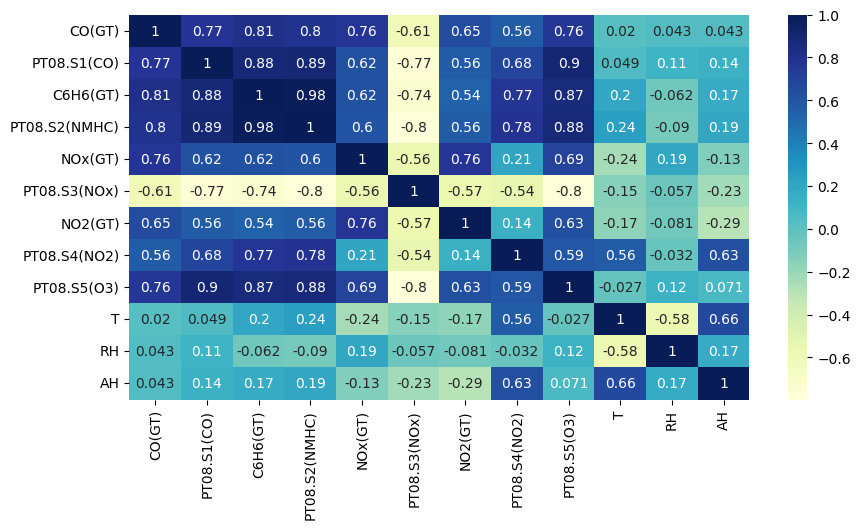

In [ ]:
for i, col in enumerate(data.columns):
  data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
X = data.drop(columns = ['CO(GT)'])
y = data['CO(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [ ]:
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01]}),
    "Multi-Layer Perceptron": (MLPRegressor(), {'hidden_layer_sizes': [(40, 40, 40)], 'activation': ['relu'], 'alpha': [0.01], 'learning_rate': ['constant'], 'solver': ['adam']}),
    "K-Nearest Neighbors": (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']})
}

In [ ]:
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    mse, r2 = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    results[model_name] = {'mse': mse, 'r2': r2, 'best_params': best_params}
    print(f"{model_name}:")
    print(f"  Best Parameters: {best_params}")
    print(f"  MSE: {mse}")
    print(f"  R2: {r2}")
    print()

Linear Regression:
  Best Parameters: {}
  MSE: 0.34623497401244213
  R2: 0.8135076041920016

Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 300}
  MSE: 0.2327903360518627
  R2: 0.8746122409641355

Gradient Boosting:
  Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
  MSE: 0.27178708061390094
  R2: 0.8536074411375711

Multi-Layer Perceptron:
  Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,)}
  MSE: 0.525077690419561
  R2: 0.717177628427117

K-Nearest Neighbors:
  Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
  MSE: 0.27965553548797584
  R2: 0.849369258657714



In [ ]:
optimal_model = MLPRegressor(hidden_layer_sizes=(40,40,40), max_iter=1000, random_state=42)
mse_nn, r2_nn = evaluate_model(optimal_model, X_train_scaled, y_train, X_test_scaled, y_test)
print(f"Neural Network MLP. MSE: {mse_nn}, R2: {r2_nn}")

Neural Network MLP. MSE: 0.22838013699935353, R2: 0.8769877045915131


In [ ]:
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    mse, r2 = evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[model_name] = {'mse': mse, 'r2': r2, 'best_params': best_params}
    print(f"{model_name}:")
    print(f"  Best Parameters: {best_params}")
    print(f"  MSE: {mse}")
    print(f"  R2: {r2}")
    print()

Linear Regression:
  Best Parameters: {}
  MSE: 0.3462349740124412
  R2: 0.8135076041920022

Random Forest:
  Best Parameters: {'max_depth': None, 'n_estimators': 300}
  MSE: 0.23237624852046826
  R2: 0.8748352807538743

Gradient Boosting:
  Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
  MSE: 0.2704869198852625
  R2: 0.8543077461541595

Multi-Layer Perceptron:
  Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}
  MSE: 0.2326583371548142
  R2: 0.8746833394735358

K-Nearest Neighbors:
  Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
  MSE: 0.24340567617253062
  R2: 0.8688945048600151



In [ ]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by='mse', ascending=True, inplace=True)
print(results_df)


                             mse        r2  \
Random Forest            0.23279  0.874612   
Gradient Boosting       0.271787  0.853607   
K-Nearest Neighbors     0.279656  0.849369   
Linear Regression       0.346235  0.813508   
Multi-Layer Perceptron  0.525078  0.717178   

                                                              best_params  
Random Forest                    {'max_depth': None, 'n_estimators': 300}  
Gradient Boosting             {'learning_rate': 0.1, 'n_estimators': 300}  
K-Nearest Neighbors             {'n_neighbors': 7, 'weights': 'distance'}  
Linear Regression                                                      {}  
Multi-Layer Perceptron  {'activation': 'tanh', 'hidden_layer_sizes': (...  


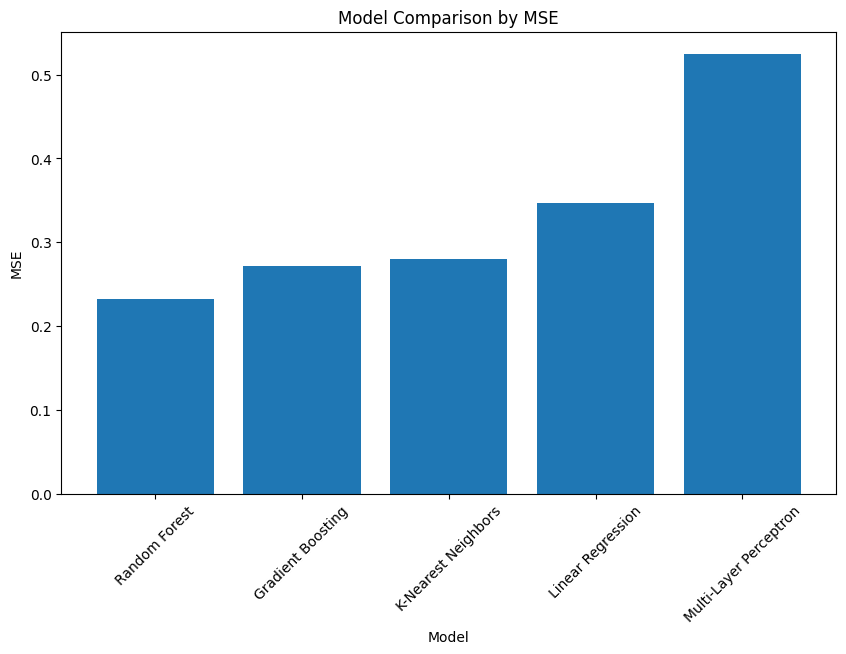

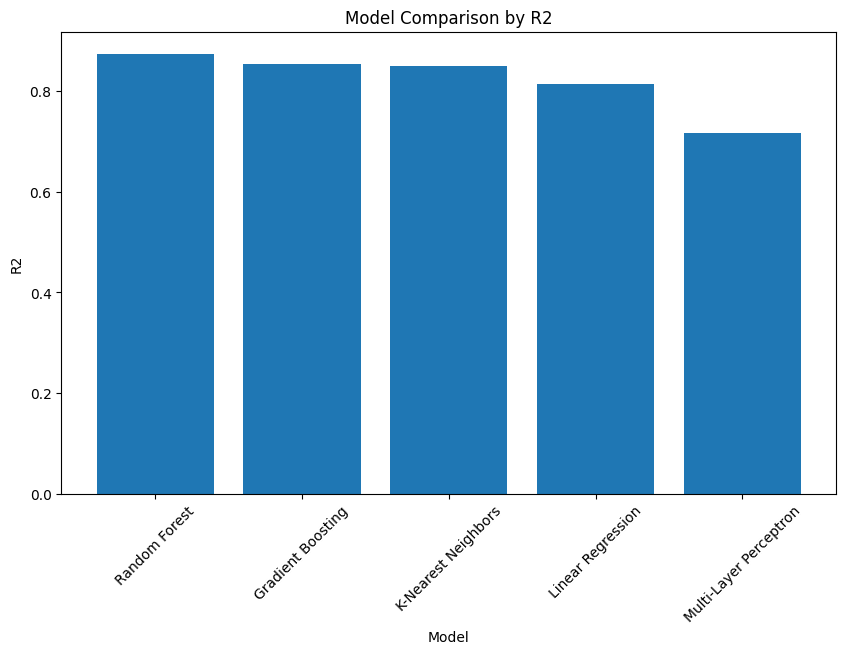

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df['mse'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Comparison by MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df['r2'])
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model Comparison by R2')
plt.xticks(rotation=45)
plt.show()